In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

#This zip objects packs each pair of lats and lngs having the same index in their respective array into a tuple

In [3]:
#unpack lat_lngs zip object into a list
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

#you can only unzip a zipped tuple once before it is removed from the computer's memory
#make sure to unziip the lats and longs into the coordinates list before moving on

In [4]:
#display the coordinate pairs - longs ang lats combinations by using print()
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-42.9731508274194 -164.73588908883795
-23.887226126866608 30.35673304950629
-35.33751320878837 94.4493321583912
29.095549531074283 82.21342783898581
11.291761816786476 -48.97477640003501
-64.91888378678036 82.95947105512744
-3.3952622114077826 42.55546029144628
12.077885727829056 176.07128465100726
88.06662189948833 129.8610560605773
51.185758189352526 -83.64450742383124
50.48968944930914 -124.67603816533033
-46.37106725709308 -21.81730745524598
13.979681026407675 -92.27368680513719
85.6119164751521 112.05814506135943
-46.95075858264253 -61.9595655808328
45.26850094163322 35.03256285184335
-75.79896163055747 -131.37110644457857
-87.61709619783672 115.7360325569282
23.67027748882461 163.61889735869664
33.78649519960082 10.800304931530519
-62.53493473372856 -49.65100511500887
56.51692751723829 177.50183919877594
75.41070537522029 132.02772703368947
-69.62369299634332 -33.49019013188848
-78.33957776215662 -94.25895322542571
-78.61450375930991 -134.91263188831664
-11.02859055534671 -122.68

-54.57381733114245 -95.55018810118258
54.71320619754371 151.21267253759794
33.48070375729067 12.792768557818931
-75.95289698762369 -40.005321134973514
16.479232497621894 147.3684252797899
9.755816661578834 157.75499600002598
-53.81033097105836 0.7220898182257827
-88.71613891756883 53.446173106217344
58.857679144207 -89.71715084016334
-13.570113976701961 60.47803256844429
84.30995022755707 -92.7945331354533
17.749515396244433 65.24892795983132
-3.738887683807235 -130.32125946112987
0.36513057761710854 -172.98357378648907
-71.96865684623002 -128.93412929507875
-71.60047822710142 128.5875304232586
16.642773662943483 -150.72228844940912
38.09144969282255 -31.676944004486216
0.5904319008350996 -174.69535933915213
87.45994842631981 -117.07431637022465
36.66704583730396 37.63730198661483
-15.465120238666614 165.2397233683804
77.74971941905014 88.37800603764873
-66.94225680121002 -57.43226259181081
67.85125679057055 -133.38665395706496
-75.65069227278359 31.264079897115494
-12.761059368456785 

In [5]:
#Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

592

# Retrieve City Weather Data

In [11]:
#Import dependencies
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
#Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 toS the record count
    record_count += 1

    ### Code Breakdown ###
    #Create a for loop with the enumerate() method and reference the index and the city in the list
    #Check if the remainder of the index divided by 50 is equal to zero, AND if the index is greater than or equal to 50,
    # using a conditional statement.
    #Create a URL endpoint in the conditional statement. However, we are removing blank spaces in the city name and 
    # concatenating the city name using city.replace(" ","+"). This will find the corresponding weather data for the city
    # instead of finding the weather data for the first part of the city name.
    #Add a print statement that tells the record count, set count, and the city that is being processed
    #Then add 1 to the record count before the next city is processed

#Run an API request for each of the cites 
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat, 
                          'Lng': city_lng, 
                          'Max Temp': city_max_temp, 
                          'Humidity': city_humidity, 
                          'Cloudiness': city_clouds, 
                          'Wind Speed': city_wind, 
                          'Country': city_country, 
                          'Date': city_date})
#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that the Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | nkowakowa
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | jumla
Processing Record 5 of Set 1 | sinnamary
Processing Record 6 of Set 1 | lamu
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | hearst
Processing Record 10 of Set 1 | powell river
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | champerico
Processing Record 13 of Set 1 | saskylakh
Processing Record 14 of Set 1 | rawson
Processing Record 15 of Set 1 | yarke pole
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | jarjis
City not found. Skipping...
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | beringovskiy
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | atuona
Processing Rec

Processing Record 38 of Set 4 | lavrentiya
Processing Record 39 of Set 4 | ural
Processing Record 40 of Set 4 | klaksvik
Processing Record 41 of Set 4 | rawannawi
City not found. Skipping...
Processing Record 42 of Set 4 | visby
Processing Record 43 of Set 4 | savonlinna
Processing Record 44 of Set 4 | isangel
Processing Record 45 of Set 4 | beni mazar
Processing Record 46 of Set 4 | lincoln
Processing Record 47 of Set 4 | maragheh
Processing Record 48 of Set 4 | ixtapa
Processing Record 49 of Set 4 | harper
Processing Record 50 of Set 4 | englehart
Processing Record 1 of Set 5 | tarko-sale
Processing Record 2 of Set 5 | victoria
Processing Record 3 of Set 5 | tilichiki
Processing Record 4 of Set 5 | tsabong
Processing Record 5 of Set 5 | ranong
Processing Record 6 of Set 5 | mayo
Processing Record 7 of Set 5 | neryungri
Processing Record 8 of Set 5 | gat
Processing Record 9 of Set 5 | cao bang
Processing Record 10 of Set 5 | nola
Processing Record 11 of Set 5 | zhigansk
Processing Rec

Processing Record 23 of Set 8 | pinahat
Processing Record 24 of Set 8 | kut chap
Processing Record 25 of Set 8 | faanui
Processing Record 26 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 27 of Set 8 | kijang
Processing Record 28 of Set 8 | padang
Processing Record 29 of Set 8 | puerto baquerizo moreno
Processing Record 30 of Set 8 | vestmannaeyjar
Processing Record 31 of Set 8 | timizart
Processing Record 32 of Set 8 | husavik
Processing Record 33 of Set 8 | kavieng
Processing Record 34 of Set 8 | shumskiy
Processing Record 35 of Set 8 | vallenar
Processing Record 36 of Set 8 | elizabeth city
Processing Record 37 of Set 8 | martyush
Processing Record 38 of Set 8 | waddan
Processing Record 39 of Set 8 | karaul
City not found. Skipping...
Processing Record 40 of Set 8 | tautira
Processing Record 41 of Set 8 | chake chake
Processing Record 42 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 43 of Set 8 | bud
Processing Record 44 of Set 8 | adet
Processing Recor

Processing Record 12 of Set 12 | chapais
Processing Record 13 of Set 12 | omboue
Processing Record 14 of Set 12 | nantucket
Processing Record 15 of Set 12 | concordia
Processing Record 16 of Set 12 | lobez
Processing Record 17 of Set 12 | kailua
Processing Record 18 of Set 12 | miranda
Processing Record 19 of Set 12 | kavaratti
Processing Record 20 of Set 12 | akdepe
Processing Record 21 of Set 12 | dingle
Processing Record 22 of Set 12 | lazaro cardenas
Processing Record 23 of Set 12 | stoyba
City not found. Skipping...
Processing Record 24 of Set 12 | lubao
Processing Record 25 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 26 of Set 12 | tateyama
Processing Record 27 of Set 12 | longyan
Processing Record 28 of Set 12 | contai
Processing Record 29 of Set 12 | baikunthpur
Processing Record 30 of Set 12 | ler
Processing Record 31 of Set 12 | kasongo-lunda
Processing Record 32 of Set 12 | umea
Processing Record 33 of Set 12 | mugur-aksy
Processing Record 34 of Set 12 

In [13]:
len(city_data)

538

In [14]:
#Convert the array of dictionaries into a Pandas data frame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.2078,-159.7750,82.45,89,75,5.75,CK,2022-05-12 21:22:04
1,Nkowakowa,-23.8878,30.2871,63.57,74,1,3.85,ZA,2022-05-12 21:22:05
2,Busselton,-33.6500,115.3333,56.23,73,95,20.09,AU,2022-05-12 21:22:06
3,Jumla,29.2747,82.1838,56.05,89,43,3.83,NP,2022-05-12 21:22:06
4,Sinnamary,5.3833,-52.9500,79.12,85,9,12.19,GF,2022-05-12 21:22:07
5,Lamu,-2.2717,40.9020,80.51,75,17,15.79,KE,2022-05-12 21:22:07
6,Butaritari,3.0707,172.7902,81.39,77,100,18.14,KI,2022-05-12 21:16:22
7,Tiksi,71.6872,128.8694,14.31,88,10,9.26,RU,2022-05-12 21:22:08
8,Hearst,49.6835,-83.6665,59.25,97,100,6.44,CA,2022-05-12 21:22:09
9,Powell River,49.8496,-124.5361,48.07,93,100,5.75,CA,2022-05-12 21:22:09


In [17]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2022-05-12 21:22:04,-21.2078,-159.7750,82.45,89,75,5.75
1,Nkowakowa,ZA,2022-05-12 21:22:05,-23.8878,30.2871,63.57,74,1,3.85
2,Busselton,AU,2022-05-12 21:22:06,-33.6500,115.3333,56.23,73,95,20.09
3,Jumla,NP,2022-05-12 21:22:06,29.2747,82.1838,56.05,89,43,3.83
4,Sinnamary,GF,2022-05-12 21:22:07,5.3833,-52.9500,79.12,85,9,12.19
5,Lamu,KE,2022-05-12 21:22:07,-2.2717,40.9020,80.51,75,17,15.79
6,Butaritari,KI,2022-05-12 21:16:22,3.0707,172.7902,81.39,77,100,18.14
7,Tiksi,RU,2022-05-12 21:22:08,71.6872,128.8694,14.31,88,10,9.26
8,Hearst,CA,2022-05-12 21:22:09,49.6835,-83.6665,59.25,97,100,6.44
9,Powell River,CA,2022-05-12 21:22:09,49.8496,-124.5361,48.07,93,100,5.75


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plot Latitude vs. Temperature

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [25]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1652391968.229536

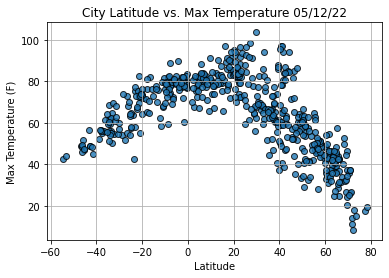

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

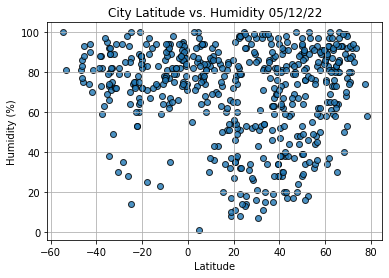

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

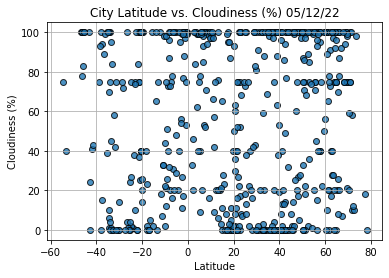

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

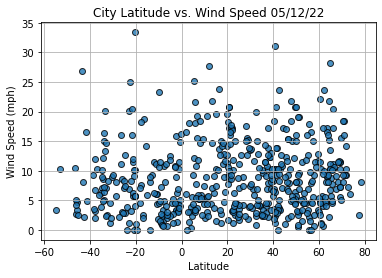

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


# Finding Correlation

In [31]:
#Import linregress
from scipy.stats import linregress

#Create a function to perform linear regression on the weather data and plot a regression line with the equation
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    #Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))
    
    #Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    #Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
#Create Northern and Southern Hemisphere data frames
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Jumla,NP,2022-05-12 21:22:06,29.2747,82.1838,56.05,89,43,3.83
4,Sinnamary,GF,2022-05-12 21:22:07,5.3833,-52.9500,79.12,85,9,12.19
6,Butaritari,KI,2022-05-12 21:16:22,3.0707,172.7902,81.39,77,100,18.14
7,Tiksi,RU,2022-05-12 21:22:08,71.6872,128.8694,14.31,88,10,9.26
8,Hearst,CA,2022-05-12 21:22:09,49.6835,-83.6665,59.25,97,100,6.44


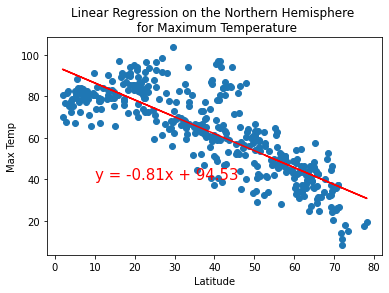

In [34]:
#Linear regression on the Northern Hemisphere (Max Temp)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp', (10,40))

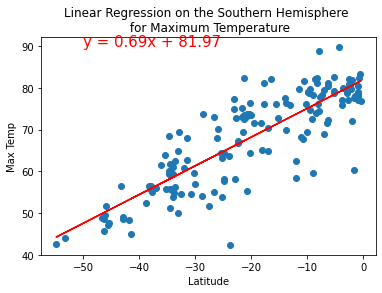

In [35]:
#Linear regression on the Southern Hemisphere (Max Temp)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp', (-50,90))

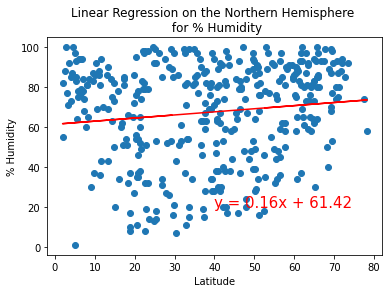

In [36]:
#Linear regression on the Northern Hemisphere (Humidity)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity', (40,20))

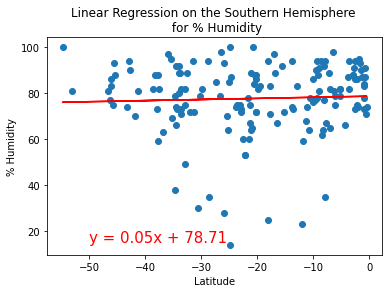

In [37]:
#Linear regression on the Southern Hemisphere (Humidity)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity', (-50,15))

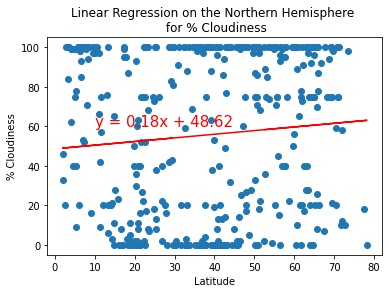

In [38]:
#Linear regression on the Northern Hemisphere (Cloudiness)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness', (10,60))

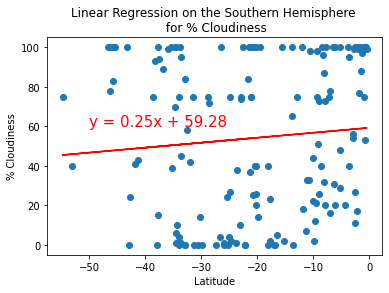

In [39]:
#Linear regression on the Southern Hemisphere (Cloudiness)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness', (-50,60))

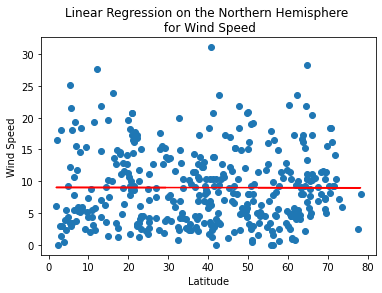

In [40]:
#Linear regression on the Northern Hemisphere (Wind Speed)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed', (40,35))

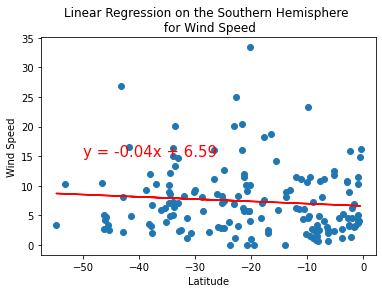

In [41]:
#Linear regression on the Southern Hemisphere (Wind Speed)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed', (-50,15))
